In [1]:
## Poisson Equation in 1D with Dirichlet BC's ##
# Equation: -(Laplacian)u = pi^2 * sin(pi*x)
# X between -1,1
#BC's: u(-1) = 0, u(1) = 0
#Note: The exact solution is u = sin(pi*x)

import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from deepxde.backend import tf



Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
geom = dde.geometry.Interval(-1,1)

def pde(x,y): #y is what we're calling u(x)
    dy_xx = dde.grad.hessian(y,x)
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x) #Why use tf sin an not np sin here?
    #Return the residual of the PDE

def boundary(x, on_boundary): #X is a d-dimensional vector, 1 in this case.
    return on_boundary #on_boundary is built in to deepXDE?

def func(x): #Func returns the value for a Dirichlet BC on our domain
    return np.sin(np.pi * x) 

bc = dde.DirichletBC(geom, func, boundary) #Note that in this case, func is the exact solution too

data = dde.data.PDE(geom, pde, bc, 16, 2, solution = func, num_test = 100)

/home/tony/.local/lib/python3.6/site-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+18=18. 
  total_n_samples))


Compiling model...
Building feed-forward neural network...


/home/tony/.local/lib/python3.6/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/tony/.local/lib/python3.6/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'build' took 0.107797 s

'compile' took 0.574598 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric   
0         [4.64e+01, 1.47e-03]    [4.90e+01, 1.47e-03]    [9.74e-01]    
1000      [5.50e-04, 4.29e-07]    [9.66e-04, 4.29e-07]    [8.59e-04]    
2000      [1.83e-04, 4.71e-07]    [4.83e-04, 4.71e-07]    [1.06e-03]    
3000      [4.38e-04, 5.90e-05]    [7.99e-04, 5.90e-05]    [7.69e-03]    
4000      [3.26e-05, 5.76e-08]    [1.72e-04, 5.76e-08]    [6.87e-04]    
5000      [4.53e-04, 1.22e-05]    [4.65e-04, 1.22e-05]    [3.00e-03]    
6000      [2.01e-05, 1.43e-07]    [1.23e-04, 1.43e-07]    [5.05e-04]    
7000      [1.91e-03, 2.34e-04]    [1.66e-03, 2.34e-04]    [1.72e-02]    
8000      [1.11e-04, 2.16e-06]    [2.23e-04, 2.16e-06]    [1.44e-03]    
9000      [5.95e-05, 4.79e-06]    [1.23e-04, 4.79e-06]    [2.50e-03]    
10000     [4.72e-05, 6.14e-06]    [9.40e-05, 6.14e-06]    [2.57e-03]    

Best model at step 6000:
 

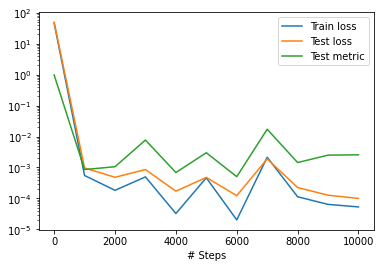

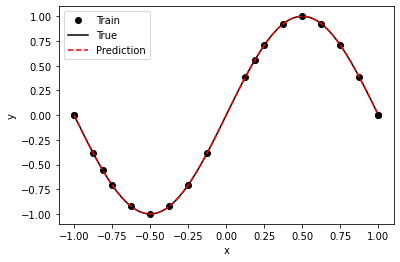

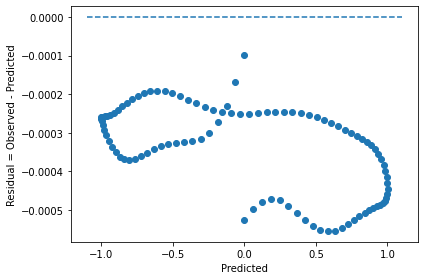

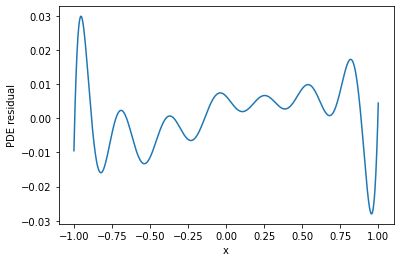

In [3]:
## Choose the network ##
layer_size = [1] + [50]*3 + [1] #3 hidden layers
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

## Build the Model ##
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

## Train the model ##
losshistory, train_state = model.train(epochs=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()